In [ ]:
## https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

In [2]:
import numpy as np

In [3]:
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        # Normalize S
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    plt.loglog(f, np.abs(np.fft.rfft(s)))


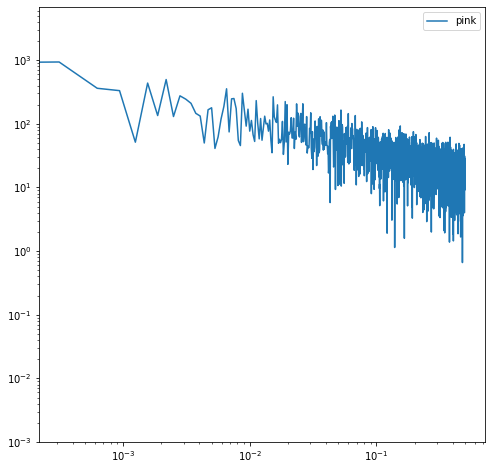

In [13]:
plt.figure(figsize=(8, 8))
for G in [pink_noise]:
    plot_spectrum(G(3200))
plt.legend(['pink'])
plt.ylim([1e-3, None]);

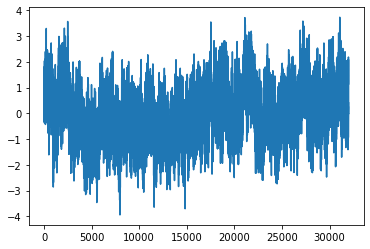

In [14]:
plt.plot(G(32000))

In [ ]:
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        # Normalize S
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

In [ ]:
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

In [15]:
print(np.sum(G(32000)))

4.547473508864641e-13
